In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the dataset from the file Ecommerce.csv

```
This dataset includes the following data for 200 online customers:

- Email
- Adress
- Avatar
- Avg Session Length (everage time they spent on usage)
- Time on App (time they spent using the application)
- Time on Website (time they spent using the website)
- Length of Membership (for how long they have been a user)
- Yearly Amount Spent (how much money they spend yearly)

Yout goal will be to estimate the value of the Yearly Amount Spent using the feature(s) of the users
```

### Get rid of non-numerical columns of the dataset

In [2]:
df = pd.read_csv('Ecommerce.csv')

df.head()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
del df["Email"]
del df["Address"]
del df["Avatar"]
df.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


### Use Yearly Amount Spent as your target variable. Plot the relationship of each of the numerical features with the target variable

Text(18.0, 0.5, 'Yearly Amount Spent')

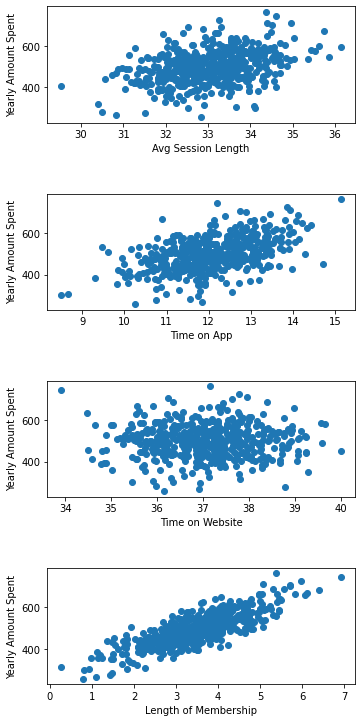

In [4]:
fig, axs = plt.subplots(4, 1)
fig.set_figwidth(5)
fig.set_figheight(10)
fig.tight_layout(h_pad = 5)

axs[0].scatter(df['Avg Session Length'], df['Yearly Amount Spent'])
axs[0].set_xlabel('Avg Session Length')
axs[0].set_ylabel('Yearly Amount Spent')

axs[1].scatter(df['Time on App'], df['Yearly Amount Spent'])
axs[1].set_xlabel('Time on App')
axs[1].set_ylabel('Yearly Amount Spent')

axs[2].scatter(df['Time on Website'], df['Yearly Amount Spent'])
axs[2].set_xlabel('Time on Website')
axs[2].set_ylabel('Yearly Amount Spent')

axs[3].scatter(df['Length of Membership'], df['Yearly Amount Spent'])
axs[3].set_xlabel('Length of Membership')
axs[3].set_ylabel('Yearly Amount Spent')

# there is an obvious linear connection betweek "Length of Membership" feature and "Yearly Amount Spent" target variable

### Leave only one feature that has a linear relationship with the target variable.

In [5]:
# obviously that is "Length of Membership" feature

df = df[['Length of Membership', 'Yearly Amount Spent']]
df

,Length of Membership,Yearly Amount Spent
0,4.082621,587.951054
1,2.664034,392.204933
2,4.104543,487.547505
3,3.120179,581.852344
4,4.446308,599.406092
...,...,...
495,3.746573,573.847438
496,3.576526,529.049004
497,4.958264,551.620145
498,2.336485,456.469510


### Divide the dataset into training and test sets with the ratio 80:20.

In [6]:
# using sklearn provided method. however, my algorithm written for k-fold cross-validation might be simplified and used as well
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[df.columns.difference(['Yearly Amount Spent'])],df['Yearly Amount Spent'], test_size=0.2, random_state=42)

### Use the resulting train and test sets with the next 2 functions to fit linear regression and plot the resulting regression line.

The first function is `fit_1d_linear_regression` that takes two vectors $x$ and $y$, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope. 

In [7]:
def fit_1d_linear_regression(data_vector, response_vector):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """
    x_vector = data_vector.to_numpy() 
    y_vector = response_vector.to_numpy()
    X_matrix = np.c_[np.ones((len(x_vector), 1)), x_vector] #adding 1-s to as a first column
    
    #TODO
    beta_vector = np.linalg.inv(X_matrix.T.dot(X_matrix)).dot(X_matrix.T).dot(y_vector) #simply using the formula for regression
    return beta_vector

In [12]:
# write fitted parameters in the fitted_vector
fitted_vector = fit_1d_linear_regression(xTrain,yTrain)
fitted_vector

array([271.3521128 ,  64.64010065])

The second function is `plot_line` function, that takes $\beta_0, \beta_1, x, y$ and plots a scatter plot of the data, and the line $y = \beta_0 + \beta_1 x$. And saves the plot in `YOURNAME.png`

In [10]:
def plot_fitted_line(b0: float,
                     b1: float,
                     x,
                     y):
    """
    :param b0: Intersept of line to plot
    Note: avoid this if you don't have an intercept in the previous function
    :param b1: Slope of the line to plot
    :param x: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x coordinates)
    :param y: A pandas series object (i.e. a column of a dataframe),
                        where each element is a label (y coordinates)
    """
    plt.plot(x, y, 'o', color='black');
    plt.plot(x, b0 + b1 * x);
    
    pass

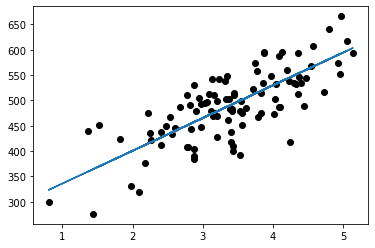

In [11]:
# making the needed plot

plot_fitted_line(fitted_vector[0], fitted_vector[1], xTest, yTest)

### Plot example

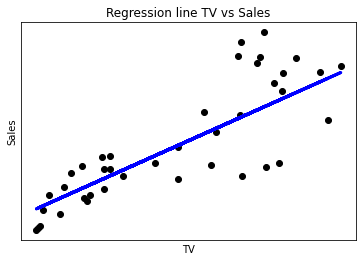

### Now fit the linear regression to the data containing only 1 feature using sklearn and compare the results with your own fit_1d_linear_regression function

In [13]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training data
regr.fit(xTrain, yTrain)

regr.intercept_, regr.coef_

(271.35211280339314, array([64.64010065]))

In [14]:
# compare with mine

fitted_vector

array([271.3521128 ,  64.64010065])

In [15]:
# sklearn predictions
y_pred = regr.predict(xTest)

# my predictions on the test data
y_pred_my = fitted_vector[0] + fitted_vector[1::].dot(xTest.T)

### Use sklearn.metrics to calculate Mean absolute error, Mean squared error, Root mean squared error and R-squared for the results of your own function vs the sklearn regression results. Try to interprete your results.

In [16]:
print("sklearn LinearRegression:")
# The coefficients
print('Coefficients: \n', regr.intercept_, regr.coef_)
# The mean squared error
print('Mean absolute error: %.2f'
      % mean_absolute_error(yTest, y_pred))

print('Mean squared error: %.2f'
      % mean_squared_error(yTest, y_pred))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(yTest, y_pred)))

print('R-squared: %.2f'
      % r2_score(yTest, y_pred))


print(" ")
print("results of my algorithm:")
# The coefficients
print('Coefficients: \n', fit_1d_linear_regression(xTrain,yTrain))
# The mean squared error
print('Mean absolute error: %.2f'
      % mean_absolute_error(yTest, y_pred_my))

print('Mean squared error: %.2f'
      % mean_squared_error(yTest, y_pred_my))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(yTest, y_pred_my)))

print('R-squared: %.2f'
      % r2_score(yTest, y_pred_my))

sklearn LinearRegression:
Coefficients: 
 271.35211280339314 [64.64010065]
Mean absolute error: 37.84
Mean squared error: 2162.11
Root mean squared error: 46.50
R-squared: 0.56
 
results of my algorithm:
Coefficients: 
 [271.3521128   64.64010065]
Mean absolute error: 37.84
Mean squared error: 2162.11
Root mean squared error: 46.50
R-squared: 0.56


### Fit linear regression to the data containing all numerical features using sklearn and use the same metrics to evaluate how good the model is.

In [17]:
df = pd.read_csv('Ecommerce.csv')

del df["Email"]
del df["Address"]
del df["Avatar"]

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[df.columns.difference(['Yearly Amount Spent'])],df['Yearly Amount Spent'], test_size=0.2, random_state=42)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training data
regr.fit(xTrain, yTrain)

# Make predictions using the testing set
y_pred = regr.predict(xTest)

regr.intercept_, regr.coef_

(-1044.257414636558,
 array([25.5962591 , 61.89682859, 38.78534598,  0.31038593]))

In [18]:
#lets check the correllation of different columns 
df.corr()

#and check that two other features Avg Session Length and Time on App are also very important

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [19]:
# now, compare with my generalized model (with all the numerical features)
fitted_vector = fit_1d_linear_regression(xTrain,yTrain)
# we see that the coefficients are the same 

y_pred_my = fitted_vector[0] + fitted_vector[1::].dot(xTest.T)

In [20]:
print("sklearn LinearRegression:")
# The coefficients
print('Coefficients: \n', regr.intercept_, regr.coef_)
# The mean squared error
print('Mean absolute error: %.2f'
      % mean_absolute_error(yTest, y_pred))

print('Mean squared error: %.2f'
      % mean_squared_error(yTest, y_pred))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(yTest, y_pred)))

print('R-squared: %.2f'
      % r2_score(yTest, y_pred))

print(" ")
print("results of my algorithm:")
# The coefficients
print('Coefficients: \n', fit_1d_linear_regression(xTrain, yTrain))
# The mean squared error
print('Mean absolute error: %.2f'
      % mean_absolute_error(yTest, y_pred_my))

print('Mean squared error: %.2f'
      % mean_squared_error(yTest, y_pred_my))

print('Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(yTest, y_pred_my)))

print('R-squared: %.2f'
      % r2_score(yTest, y_pred_my))

sklearn LinearRegression:
Coefficients: 
 -1044.257414636558 [25.5962591  61.89682859 38.78534598  0.31038593]
Mean absolute error: 8.56
Mean squared error: 109.86
Root mean squared error: 10.48
R-squared: 0.98
 
results of my algorithm:
Coefficients: 
 [-1.04425741e+03  2.55962591e+01  6.18968286e+01  3.87853460e+01
  3.10385933e-01]
Mean absolute error: 8.56
Mean squared error: 109.86
Root mean squared error: 10.48
R-squared: 0.98


### Implement K-fold Cross Validation

In [21]:
df.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [24]:
#simple own implementation of k-fold cross validation method

def k_fold_crossvalidation(dataframe, subsamples_number):
    #shuffle the dataframe (taken from google) 
    df1 = df.reindex(np.random.permutation(df.index))
    x_matrix = df1[df1.columns.difference(['Yearly Amount Spent'])]
    y_matrix = df1[['Yearly Amount Spent']]
    
    mae_values = np.zeros(subsamples_number)
    mse_values = np.zeros(subsamples_number)
    r2_score_values = np.zeros(subsamples_number)
    
    for i in range(subsamples_number):
#        x_train = np.append(x_matrix[0 : int(i/subsamples_number * len(df))], x_matrix[int((i+1)/subsamples_number * len(df)) : -1], axis = 0)
#        y_train = np.append(y_matrix[0 : int(i/subsamples_number * len(df))], y_matrix[int((i+1)/subsamples_number * len(df)) : -1], axis = 0)    
        x_train = pd.concat([x_matrix[0 : int(i/subsamples_number * len(df))], x_matrix[int((i+1)/subsamples_number * len(df)) : -1]])
        y_train = pd.concat([y_matrix[0 : int(i/subsamples_number * len(df))], y_matrix[int((i+1)/subsamples_number * len(df)) : -1]])
        
        x_test = x_matrix[int(i/subsamples_number * len(df)) : int((i+1)/subsamples_number * len(df))]
        y_test = y_matrix[int(i/subsamples_number * len(df)) : int((i+1)/subsamples_number * len(df))]

        fitted_vector = fit_1d_linear_regression(x_train,y_train)
        y_pred_my = (fitted_vector[0] + fitted_vector[1::].T.dot(x_test.T)).T
        
        mae_values[i] = mean_absolute_error(y_test, y_pred_my)
        mse_values[i] = mean_squared_error(y_test, y_pred_my)
        r2_score_values[i] = r2_score(y_test, y_pred_my)
        
    mae_mean = np.mean(mae_values)
    mse_mean = np.mean(mse_values)
    r2_score_mean = np.mean(r2_score_values)
        
    return print("MAE:", mae_mean,";", "MSE:", mse_mean,";", "square root of MSE:", np.sqrt(mse_mean),";", "R2 score:", r2_score_mean)

In [25]:
#take for example k = 5 and demonstrate result
k_fold_crossvalidation(df, 5)

MAE: 8.011802501723505 ; MSE: 102.48466319129898 ; square root of MSE: 10.123470906329459 ; R2 score: 0.9826117744473052


### Evaluate model with K-fold

In [26]:
# my algorithm outputs for k from 2 to 14:

for i in range(2,15):
    print("i = ", i)
    print(k_fold_crossvalidation(df, i))


i =  2
MAE: 8.209437989864464 ; MSE: 105.12357826651723 ; square root of MSE: 10.252978994736955 ; R2 score: 0.9831860080785314
None
i =  3
MAE: 7.978153361793802 ; MSE: 100.68471079236804 ; square root of MSE: 10.03417713578787 ; R2 score: 0.9839452594085857
None
i =  4
MAE: 7.942132299241866 ; MSE: 100.29685565030655 ; square root of MSE: 10.014831783425349 ; R2 score: 0.9837825661652528
None
i =  5
MAE: 7.925702005943452 ; MSE: 99.60375184270701 ; square root of MSE: 9.980167926578542 ; R2 score: 0.9836845912583595
None
i =  6
MAE: 7.965458519396431 ; MSE: 100.43661509579313 ; square root of MSE: 10.021806977576107 ; R2 score: 0.9828465610469269
None
i =  7
MAE: 7.939682556616682 ; MSE: 99.93456769629451 ; square root of MSE: 9.99672784946627 ; R2 score: 0.9838216821334689
None
i =  8
MAE: 7.955122930469311 ; MSE: 100.72440652047368 ; square root of MSE: 10.036154966941956 ; R2 score: 0.9835133179710931
None
i =  9
MAE: 7.951820905419584 ; MSE: 100.92097717491454 ; square root of MS

In [27]:
# using sklearn for 10 splits

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

X = df[df.columns.difference(['Yearly Amount Spent'])]
y = df[['Yearly Amount Spent']]

scores = []
best_svr = LinearRegression()
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index], y.loc[train_index], y.loc[test_index]
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))
    
scores = np.mean(scores)
scores

/Users/tigrani/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.9825492707486994

In [ ]:
# we see that both algorithms are in a good agreement